In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'E:\sumit\Data Analytics Study Material\file\Notes\Projects\delhiaqi.csv')

In [4]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [5]:
data['date'] = pd.to_datetime(data['date'])
x = data['date']
x

0     2023-01-01 00:00:00
1     2023-01-01 01:00:00
2     2023-01-01 02:00:00
3     2023-01-01 03:00:00
4     2023-01-01 04:00:00
              ...        
556   2023-01-24 04:00:00
557   2023-01-24 05:00:00
558   2023-01-24 06:00:00
559   2023-01-24 07:00:00
560   2023-01-24 08:00:00
Name: date, Length: 561, dtype: datetime64[ns]

In [28]:
y = data[['co','no','no2','o3','so2','pm2_5','pm10','nh3']]
y

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...
556,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [6]:
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x)
plt.xlabel('Date')
plt.ylabel(r'Concentration (ug/m3)')
plt.legend()

NameError: name 'y' is not defined

<Figure size 1000x500 with 0 Axes>

In [30]:
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
data['AQI'] = data.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
print(data.head())

                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  AQI    AQI Category  
0   5.83  300  Very Unhealthy  
1   7.66  300  Very Unhealthy  
2  11.40  400       Hazardous  
3  13.55  400       Hazardous  
4  14.19  400       Hazardous  


In [44]:
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]
def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    #print(row)
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        #print(pollutant)
        #print(row[pollutant])
        aqi = calculate_aqi(pollutant, row[pollutant])
        #print(aqi)
        if aqi is not None:
            aqi_values.append(aqi)
    #print(aqi_values)
    return max(aqi_values)

data['AQI'] = data.apply(calculate_overall_aqi, axis=1)

aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    #print(aqi_value)
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
print(data)

                   date       co     no    no2     o3     so2   pm2_5    pm10  \
0   2023-01-01 00:00:00  1655.58   1.66  39.41   5.90   17.88  169.29  194.64   
1   2023-01-01 01:00:00  1869.20   6.82  42.16   1.99   22.17  182.84  211.08   
2   2023-01-01 02:00:00  2510.07  27.72  43.87   0.02   30.04  220.25  260.68   
3   2023-01-01 03:00:00  3150.94  55.43  44.55   0.85   35.76  252.90  304.12   
4   2023-01-01 04:00:00  3471.37  68.84  45.24   5.45   39.10  266.36  322.80   
..                  ...      ...    ...    ...    ...     ...     ...     ...   
556 2023-01-24 04:00:00  1762.39   4.64  37.01  33.26   30.52  231.15  289.84   
557 2023-01-24 05:00:00  1735.69   6.82  34.96  46.49   34.33  225.08  280.52   
558 2023-01-24 06:00:00  1922.61   8.16  40.10  56.51   43.39  242.49  296.07   
559 2023-01-24 07:00:00  1361.85   9.05  52.78  71.53  100.14  165.67  191.82   
560 2023-01-24 08:00:00  1134.87   8.61  56.89  80.11  110.63  123.76  140.26   

       nh3  AQI    AQI Cate

In [45]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,400,Hazardous
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,400,Hazardous
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,400,Hazardous
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,300,Very Unhealthy


<BarContainer object of 561 artists>

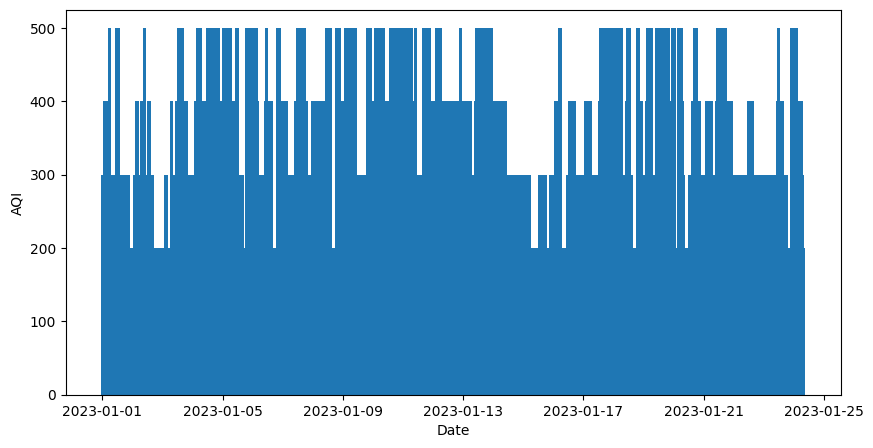

In [40]:
plt.figure(figsize=(10,5))
x = data['date']
y = data['AQI']
plt.xlabel('Date')
plt.ylabel('AQI')
plt.bar(x,y,width=0.1,)

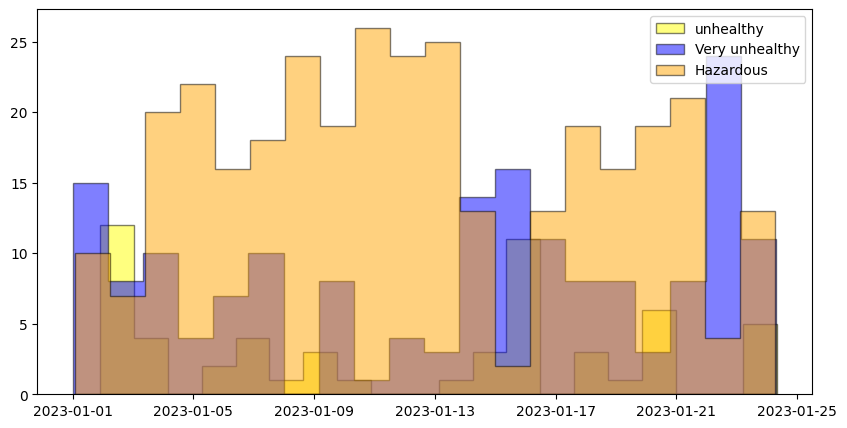

In [111]:
plt.figure(figsize=(10,5))
x = data['date']
Good = data.loc[data['AQI Category']=='Good','date']
#print(Good)
Moderate = data.loc[data['AQI Category']=='Moderate','date']
#print(Moderate)
unhealthySG = data.loc[data['AQI Category']=='Unhealthy for Sensitive Groups','date']
#print(unhealthySG)
unhealthy = data.loc[data['AQI Category']=='Unhealthy','date']
#print(unhealthy)
Vunhealthy = data.loc[data['AQI Category']=='Very Unhealthy','date']
#print(Vunhealthy)
hazardous = data.loc[data['AQI Category']=='Hazardous','date']
#print(hazardous)
#plt.hist(Good,bins='auto')
#plt.hist(Moderate,bins='auto')
#plt.hist(unhealthySG,bins='auto')
plt.hist(unhealthy,bins=20,color = 'yellow',alpha = 0.5,ec = 'black',label = 'unhealthy',histtype = 'stepfilled')
plt.hist(Vunhealthy,bins=20,color = 'blue',alpha = 0.5,ec = 'black',label = 'Very unhealthy',histtype = 'stepfilled')
plt.hist(hazardous,bins=20,color = 'orange',alpha = 0.5,ec = 'black',label = 'Hazardous',histtype = 'stepfilled')
plt.legend()

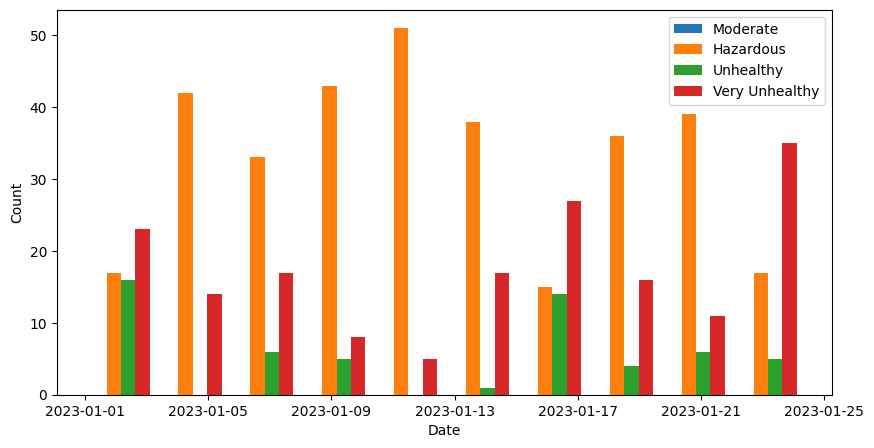

In [118]:
plt.figure(figsize=(10,5))
w = Moderate = data.loc[data['AQI Category']=='Moderate','date']
x = data.loc[data['AQI Category']=='Hazardous','date']
y = data.loc[data['AQI Category']=='Unhealthy','date']
z = Vunhealthy = data.loc[data['AQI Category']=='Very Unhealthy','date']
plt.hist([w,x,y,z],label = ['Moderate','Hazardous','Unhealthy','Very Unhealthy'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

co       2140182.58
no         28713.09
no2        42239.09
o3         16909.63
so2        36271.98
pm2_5     200981.82
pm10      236174.50
nh3        14824.46
dtype: float64
      Pollutant  Concentration
co           co     2140182.58
no           no       28713.09
no2         no2       42239.09
o3           o3       16909.63
so2         so2       36271.98
pm2_5     pm2_5      200981.82
pm10       pm10      236174.50
nh3         nh3       14824.46


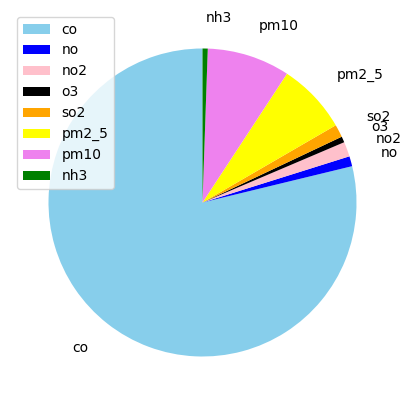

In [163]:
plt.figure(figsize=(10,5))
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
total_concentrations = data[pollutants].sum()
print(total_concentrations)
c = ['skyblue','blue','pink','black','orange','yellow','violet','green']
l = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})
print(concentration_data)

plt.pie(total_concentrations,colors=c,radius=1,labels=l, labeldistance=1.2,startangle=90)
plt.legend(loc='best')

In [164]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous


In [169]:
data['Hour'] = data.date.dt.hour

In [171]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4
...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,400,Hazardous,4
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,400,Hazardous,5
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,400,Hazardous,6
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,300,Very Unhealthy,7


In [193]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour,hourly_avg_aqi
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0,362.500000
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1,370.833333
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2,400.000000
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3,408.333333
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4,412.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,400,Hazardous,4,NaN
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,400,Hazardous,5,NaN
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,400,Hazardous,6,NaN
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,300,Very Unhealthy,7,NaN


In [196]:
del data['hourly_avg_aqi']

In [197]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4
...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,400,Hazardous,4
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,400,Hazardous,5
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,400,Hazardous,6
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,300,Very Unhealthy,7


In [198]:
hourly_avg_aqi = data.groupby('Hour')['AQI'].mean().reset_index()

In [199]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4
...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,400,Hazardous,4
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,400,Hazardous,5
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,400,Hazardous,6
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,300,Very Unhealthy,7


In [200]:
hourly_avg_aqi

,Hour,AQI
0,0,362.500000
1,1,370.833333
2,2,400.000000
3,3,408.333333
4,4,412.500000
5,5,408.333333
6,6,408.333333
7,7,350.000000
8,8,329.166667
9,9,317.391304


In [201]:
hourly_avg_aqi.shape

(24, 2)

In [204]:
hourly_avg_aqi.describe

<bound method NDFrame.describe of     Hour         AQI
0      0  362.500000
1      1  370.833333
2      2  400.000000
3      3  408.333333
4      4  412.500000
5      5  408.333333
6      6  408.333333
7      7  350.000000
8      8  329.166667
9      9  317.391304
10    10  369.565217
11    11  378.260870
12    12  391.304348
13    13  404.347826
14    14  404.347826
15    15  386.956522
16    16  378.260870
17    17  369.565217
18    18  356.521739
19    19  378.260870
20    20  395.652174
21    21  382.608696
22    22  369.565217
23    23  365.217391>

Text(0, 0.5, 'Average AQI')

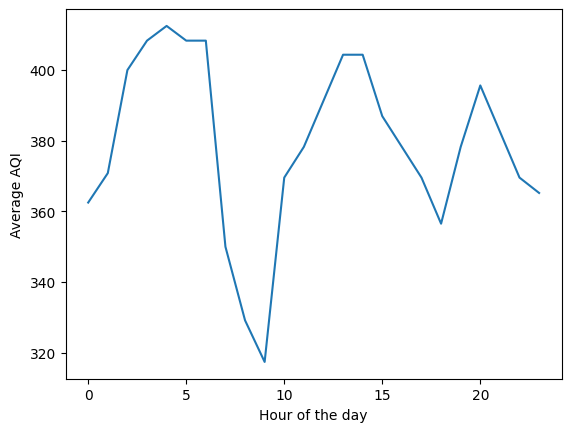

In [209]:
plt.plot(hourly_avg_aqi['Hour'],hourly_avg_aqi['AQI'])
plt.xlabel('Hour of the day')
plt.ylabel('Average AQI')

In [210]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4


In [222]:
data['weekday'] = data['date'].dt.dayofweek

In [223]:
del data['weekday']

In [224]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4


In [227]:
data['weekday'] = data['date'].dt.dayofweek

In [228]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI Category,Hour,weekday
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,300,Very Unhealthy,0,6
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,300,Very Unhealthy,1,6
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,400,Hazardous,2,6
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,400,Hazardous,3,6
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,400,Hazardous,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,400,Hazardous,4,1
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,400,Hazardous,5,1
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,400,Hazardous,6,1
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,300,Very Unhealthy,7,1


In [238]:
week_day = data.groupby(data['weekday'])['AQI'].mean().reset_index()

In [239]:
week_day

,weekday,AQI
0,0,340.625000
1,1,403.703704
2,2,425.000000
3,3,423.611111
4,4,383.333333
5,5,376.388889
6,6,328.125000


In [240]:
week_day.shape

(7, 2)

In [246]:
week_day['weekday'].replace(({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}),
                            inplace=True)
week_day


,weekday,AQI
0,Sunday,340.625000
1,Monday,403.703704
2,Tuesday,425.000000
3,Wednesday,423.611111
4,Thursday,383.333333
5,Friday,376.388889
6,Saturday,328.125000


([<matplotlib.axis.XTick at 0x1cfd9660278>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

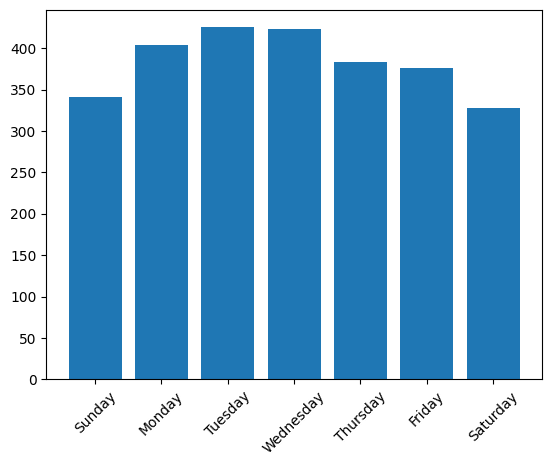

In [255]:
plt.bar(week_day['weekday'],week_day['AQI'])
plt.xticks(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation=45)